In [84]:
import numpy as np
import matplotlib.pyplot as plt


In [99]:
# parameters
eps11 = -30 #MHz 
dt  = 1e6 #ns
tau_B = 1e9 #ns
tau_eps = 1e9 #ns
sig_eps = 0.5 #mV
sig_B = 30 #MHz
n = 1000
sig_measure = 0.5 #MHz

def J(eps, J0 = 20, J1 = 725, eps0 = 4.4):
    return J0 + J1*np.exp(eps/eps0)

def dJ(eps, J0 = 20, J1 = 725, eps0 = 4.4):
    return J1/eps0*np.exp(eps/eps0)


def eps_J(J, J0 = 20, J1 = 725, eps0 = 4.4):
    return (np.log((J - J0)/J1))*eps0

# single step of o-u process with time step dt, and correlation time tau, and variance sigma
def ou_step(x, dt, tau, sigma):
    return x - dt/tau * x + np.sqrt(dt/tau) * sigma * np.random.randn()

# simulate the o-u process with time step dt, and correlation time tau, and variance sigma
def ou_process(dt, tau, sigma, n):
    x = np.zeros(n)
    x[0]  = np.random.randn()
    for i in range(1, n):
        x[i] = ou_step(x[i-1], dt, tau, sigma)
    return x

# simulate the measurement of the frequency with noise
def measure(B, eps):
    om_ideal = np.sqrt(B**2 + J(eps)**2)
    noise = sig_measure*np.random.randn()
    return om_ideal + noise


# simulate the measurement of the frequencies at two detunigs with noise
def single_run(N, B0, deps0, Bmin, feedback=True):
    measured_om = {"11": [], "02": []} 
    error_om = {"11": [], "02": []}
    Bs = [(B0,0)]
    Js = [(J(eps11),0)]
    deps = [(deps0,0)]
    B_est = []
    Bs_used = []
    eps_f = 0
    n = 0
    timestamp = 0
    while n < N:
        #measurm at at (1,1)
        Bs.append((ou_step(Bs[-1][0], dt, tau_B, sig_B),timestamp))
        deps.append((ou_step(deps[-1][0], dt, tau_eps, sig_eps),timestamp))
        eps = eps11+deps[-1][0]+eps_f
        Bs_used.append(False)
        #Js.append((J(eps), timestamp))

        measured_om["11"].append((measure(Bs[-1][0], eps), timestamp))
        error_om["11"].append((measured_om["11"][-1][0] - np.sqrt(Bs[-1][0]**2 + Js[-1][0]**2), timestamp)) #Error between estimation and the real om11

        timestamp += dt
        
        #inference of B
        B_est.append((np.sqrt(measured_om["11"][-1][0]**2 - J(eps11)**2),timestamp))  #our estimation of B
        if B_est[-1][0] > Bmin:
            Bs_used.append(True)
            eps02 = eps_J(B_est[-1][0])  #set detuning to Hadamrd
        
            #measurment at (0,2)
            Bs.append((ou_step(Bs[-1][0], dt, tau_B, sig_B),timestamp))
            
            deps.append((ou_step(deps[-1][0], dt, tau_eps, sig_eps),timestamp))
            eps = eps02+deps[-1][0]+eps_f
            Js.append((J(eps), timestamp))
            
            measured_om["02"].append((measure(Bs[-1][0], eps02+deps[-1][0]+eps_f), timestamp))
            error_om["02"] = measured_om["02"][-1][0] - np.sqrt(Bs[-1][0]**2 + Js[-1][0])

            timestamp += dt
            print(eps_f)
            #Feedback on eps:
            if feedback:
                eps_f -= (np.sqrt(measured_om["02"][-1][0]**2-B_est[-1][0]**2) - B_est[-1][0])/dJ(eps02)
            else:
                eps_f = 0
            n += 1
            
    return Bs, Js, B_est,measured_om, error_om, Bs_used
    










cc

In [86]:

#np.random.seed(8151)
#Bs,Js, measured_om, error_om = single_run(N=50, B0= B0, deps0 = 0, Bmin = 30, feedback=False)

In [87]:
# plot the results om11, om02, and the difference dom11, dom02 on the y-log scale, using two subplots. top: om11, om02, bottom: dom11, dom02
plt.figure(figsize=(10,10))




plt.subplot(2,1,1)
plt.plot(, label = r"$\Omega_{02}$")
plt.plot(om11, label = r"$\Omega_{11}$")
plt.plot(Bs, label = "B")
plt.legend()

plt.subplot(2,1,2)
plt.plot(dom02)
plt.plot(dom11)
plt.yscale("log")

SyntaxError: invalid syntax (4174017656.py, line 8)

In [100]:
#B0 = sig_B*np.random.randn()
B0 = 50
np.random.seed(8151)
Bs,Js, B_est, measured_om, error_om, Bs_used = single_run(N=50, B0= B0, deps0 = 0, Bmin = 30, feedback=True)

Js_val = np.array(Js)[:,0]
Js_time = np.array(Js)[:,1]
Bs_val = np.array(Bs)[:,0]
Bs_time = np.array(Bs)[:,1]
B_est_val = np.array(B_est)[:,0]

B_est_time = np.array(B_est)[:,1]

#plt.plot(np.arctan2(np.abs(Bs_val), Js_val)/np.pi, alpha=0.5)

0
-0.10324684648603409
-0.45581450302846
-0.22587996862107218
-0.17038643109992613
-0.0899014033275283
-0.024470271884972625
0.3759928478065921
0.11664300320618565
-0.12734498366731686
0.42848187454589737
-0.01647367058386401
0.3498574075771872
0.14515745004827965
0.25266281467072227
0.020852949818761568
-0.3713335985956041
0.31988183104785994
-0.48597627833710955
-0.00946719603556051
0.03089886207986469
-0.006851344642627814
0.19066540759831896
-0.1019088063182379
0.1035968070912757
0.10721273785207427
0.14283235704067532
-0.16037692889528127
-0.2586823785276917
-0.18011836227383488
0.4132758471257287
0.10086842246317923
0.08282699229326881
-0.3708082195993131
-0.6195920703019188
-0.4185162995925952
-0.2891927781273246
-0.03228082382327352
0.40917824878244247
0.45118457778095966
-0.1429376004514834
0.024863550156120073
0.44170131832249976
0.24756817723078087
-0.24491358677189864
0.08195473034073061
0.27699320283860535
0.14222592700542744
0.15435072707373118
-0.057887300313772705


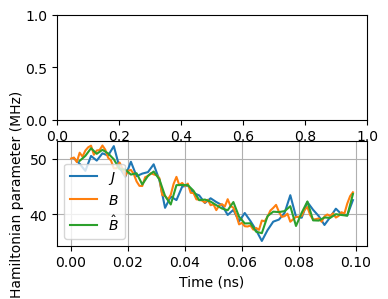

In [101]:
#Plot (4,3) size, with grid and x-axis named time and y-axis named Hamiltonian parameter
plt.subplots(2,1,figsize=(4,3))

plt.grid()
plt.xlabel("Time (ns)")
plt.ylabel("Hamiltonian parameter (MHz)")

plt.plot(Js_time[1:]/1e9,Js_val[1:], label="$J$")
plt.plot(Bs_time[1:]/1e9, Bs_val[1:], label="$B$")
plt.plot(B_est_time[1:]/1e9, B_est_val[1:], label = r"$\hat B$")
plt.legend()
plt.savefig("estimation_simulation.png")

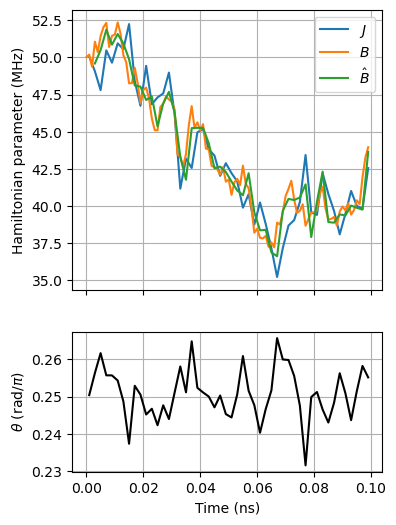

In [108]:

#create two subplots, in upper one plot B, B_est and J and in the other arctan2(J,B)
fig, ax = plt.subplots(2,1,figsize=(4,6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
ax[0].plot(Js_time[1:]/1e9,Js_val[1:], label="$J$")
ax[0].plot(Bs_time[1:]/1e9, Bs_val[1:], label="$B$")
ax[0].plot(B_est_time[1:]/1e9, B_est_val[1:], label = r"$\hat B$")
ax[0].legend()
ax[0].grid()
#ax[0].set_xlabel("Time (ns)")
ax[0].set_ylabel("Hamiltonian parameter (MHz)")
ax[1].plot(Js_time[1:]/1e9, np.arctan2(np.abs(Bs_val[1:][Bs_used]), Js_val[1:])/np.pi, "k", alpha=1)
ax[1].set_ylabel(r"$\theta$ (rad/$\pi$)")
ax[1].grid()
ax[1].set_xlabel("Time (ns)")
plt.savefig("estimation_simulation.png",dpi=200)

In [98]:
# create two subplots with the height proportions 2:1
fig, ax = plt.subplots(2,1,figsize=(4,6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})


IndexError: boolean index did not match indexed array along dimension 0; dimension is 101 but corresponding boolean dimension is 50